# Función de Coherencia

## Ejemplo. Grabar sonido con el micrófono integrado

### Instalar la biblioteca para manejo de audio

Windows
Abrir Anaconda Prompt
Ejecutar la siguiente instrucción
```bash
conda install -c poppy-project sounddevice 
```


Linux y MacOS
```bash
sudo pip install sounddevice 
```

### Importar bibliotecas

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import sounddevice       as sd

from scipy import signal

### Definición de parámetros

In [2]:
fs                    = 8400
duracion              = 2.5  #segundos
sd.default.samplerate = fs
sd.default.channels   = 2

### Grabar 

In [3]:
#sd.wait()
sound = sd.rec( int(duracion * fs), dtype='float64', blocking=True)

### Reproducir

In [4]:
sd.play(sound)

### Graficar

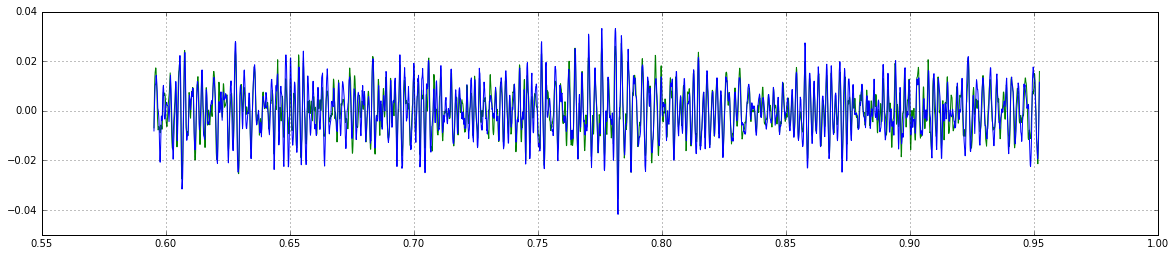

In [5]:
t  = np.linspace(0,duracion,int(duracion * fs) )
ts = [5000,8000]

plt.figure( figsize=(20,4) )
plt.plot(t[ ts[0]:ts[1] ],sound[ ts[0]:ts[1],0 ] ,'g',linewidth=1)
plt.plot(t[ ts[0]:ts[1] ],sound[ ts[0]:ts[1],1 ] ,'b',linewidth=1)
plt.grid(True)
plt.show()

### Reproducir

## Ejemplo: Reconocer comandos utilizando la función de coherencia

In [6]:
fs                    = 8400
duracion              = 1.  #segundos
sd.default.samplerate = fs
sd.default.channels   = 2

In [93]:
#Hola
S1  = []
tmp = sd.rec( int(duracion * fs), dtype='float64', blocking=True)

S1.append(tmp)
sd.play(tmp)

In [94]:
tmp = sd.rec( int(duracion * fs), dtype='float64', blocking=True)

S1.append(tmp)
sd.play(tmp)

In [95]:
S1 = np.array(S1)
print S1.shape

(2, 8400, 2)


In [96]:
#Aplauso
S2  = []
tmp = sd.rec( int(duracion * fs), dtype='float64', blocking=True)

S2.append(tmp)
sd.play(tmp)

In [97]:
tmp = sd.rec( int(duracion * fs), dtype='float64', blocking=True)

S2.append(tmp)
sd.play(tmp)

In [98]:
S2 = np.array(S2)
print S2.shape

(2, 8400, 2)


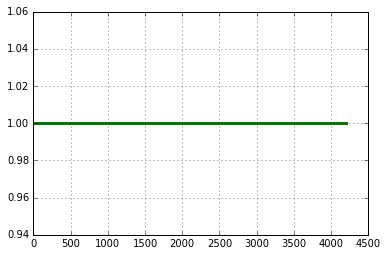

In [99]:
w,h = signal.coherence( S1[0,:,0],S1[0,:,0],fs=fs )

plt.plot(w,h,'g',linewidth=3)
plt.grid(True)
plt.show()
#print S1[0,:,0].shape

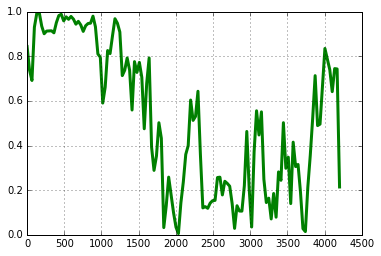

In [100]:
w,h = signal.coherence( S1[0,:,0],S1[0,:,1],fs=fs )

plt.plot(w,h,'g',linewidth=3)
plt.grid(True)
plt.show()
#print S1[0,:,0].shape

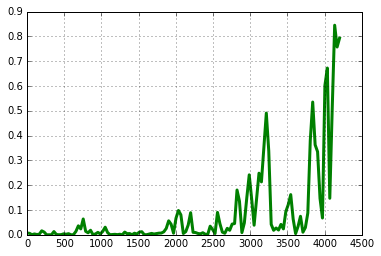

In [101]:
w,h = signal.coherence( S1[0,:,0],S1[1,:,0],fs=fs )

plt.plot(w,h,'g',linewidth=3)
plt.grid(True)
plt.show()
#print S1[0,:,0].shape

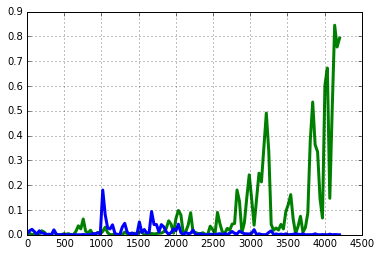

In [102]:
w,h = signal.coherence( S1[0,:,0],S1[1,:,0],fs=fs )
plt.plot(w,h,'g',linewidth=3)

w,h = signal.coherence( S1[1,:,0],S2[1,:,0],fs=fs )
plt.plot(w,h,'b',linewidth=3)


plt.grid(True)
plt.show()
#print S1[0,:,0].shape

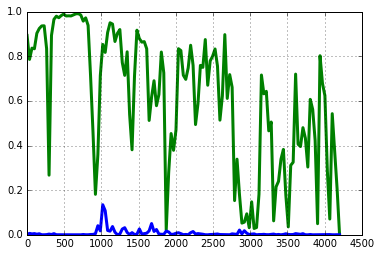

In [103]:
w,h = signal.coherence( S2[0,:,0],S2[0,:,1],fs=fs )
plt.plot(w,h,'g',linewidth=3)

w,h = signal.coherence( S2[0,:,0],S1[1,:,0],fs=fs )
plt.plot(w,h,'b',linewidth=3)


plt.grid(True)
plt.show()
#print S1[0,:,0].shape

In [104]:
#Aplauso
S3  = []
tmp = sd.rec( int(duracion * fs), dtype='float64', blocking=True)

S3.append(tmp)
sd.play(tmp)

In [105]:
#Hola
tmp = sd.rec( int(duracion * fs), dtype='float64', blocking=True)

S3.append(tmp)
sd.play(tmp)

In [106]:
#Hola
tmp = sd.rec( int(duracion * fs), dtype='float64', blocking=True)

S3.append(tmp)
sd.play(tmp)

In [107]:
#Aplauso
tmp = sd.rec( int(duracion * fs), dtype='float64', blocking=True)

S3.append(tmp)
sd.play(tmp)

In [108]:
#Adios
tmp = sd.rec( int(duracion * fs), dtype='float64', blocking=True)

S3.append(tmp)
sd.play(tmp)

In [109]:
S3 = np.array(S3)
print S3.shape

(5, 8400, 2)


In [112]:
H1, H2 = [], []
for s3 in S3:
    w1,h1 = signal.coherence( s3[:,0], S1[0,:,0], fs=fs )
    w2,h2 = signal.coherence( s3[:,0], S2[0,:,0], fs=fs )
    H1.append(h1)
    H2.append(h2)
    
    w1,h1 = signal.coherence( s3[:,1], S1[0,:,1], fs=fs )
    w2,h2 = signal.coherence( s3[:,1], S2[0,:,1], fs=fs )
    H1.append(h1)
    H2.append(h2)

H1 = np.array(H1)
H2 = np.array(H2)


6.91812475592 8.06106223889
0.0536288740769 0.0624888545651
0.496208038468 0.607854691781

6.18857796679 8.83758347919
0.0479734726108 0.0685083990635
0.42524088327 0.668348906651

5.85182594499 10.3678738453
0.0453629918216 0.0803711150798
0.498826679038 0.386817795417

5.95431824136 10.343725664
0.046157505747 0.0801839198762
0.502348887986 0.340023263826

0.797581039877 0.500408783257
0.00618279875874 0.0038791378547
0.0411432504281 0.0563369794888

0.866929280538 0.31145289131
0.00672038201967 0.00241436349853
0.0905825668103 0.0190638192764

3.91541359098 1.03453178369
0.030352043341 0.00801962623017
0.286513115218 0.0581261508714

3.76870471056 0.707740467557
0.0292147651981 0.00548636021362
0.23205904201 0.0988316116679

6.08088025984 7.62516038547
0.0471386066654 0.05910977043
0.399801032257 0.318248856317

6.23243917191 8.1721941594
0.0483134819528 0.0633503423209
0.397748487413 0.526582915124


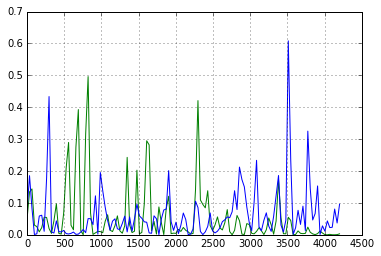

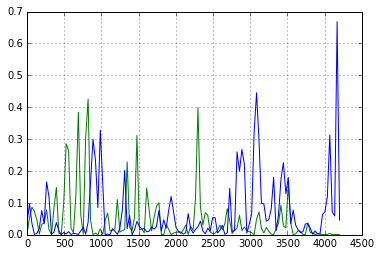

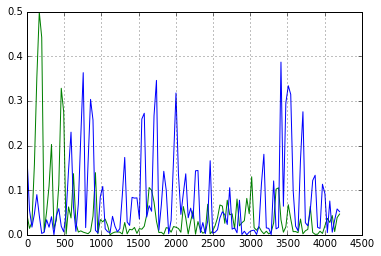

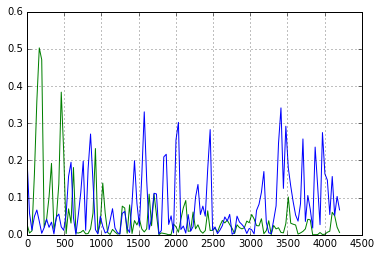

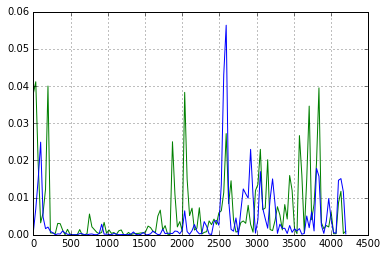

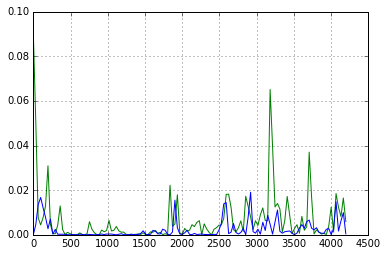

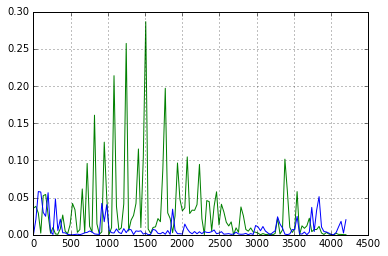

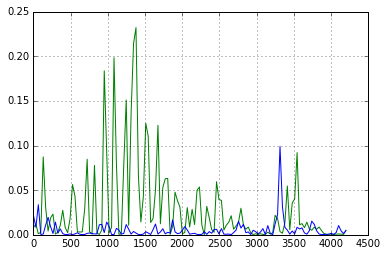

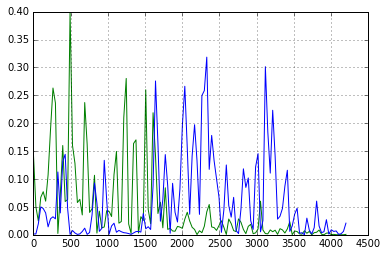

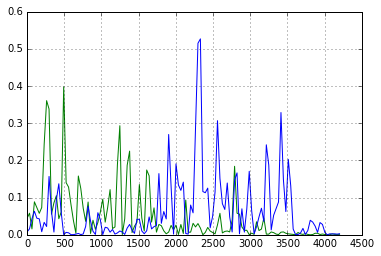

In [113]:
plt.figure(figsize=(20,4))
for h1,h2 in zip(H1,H2):
    plt.figure()
    plt.plot(w,h1,'g')
    plt.plot(w,h2,'b')
    plt.grid(True)
    print
    print h1.sum (),h2.sum ()
    print h1.mean(),h2.mean()
    print h1.ptp (),h2.ptp ()

plt.show()

0.301943463333
2.30339105432
1.1235905475
1.82053843441
0.889609297367

6.41748523773
2.73820801138
9.03399193908
5.6882401367
8.79219918756


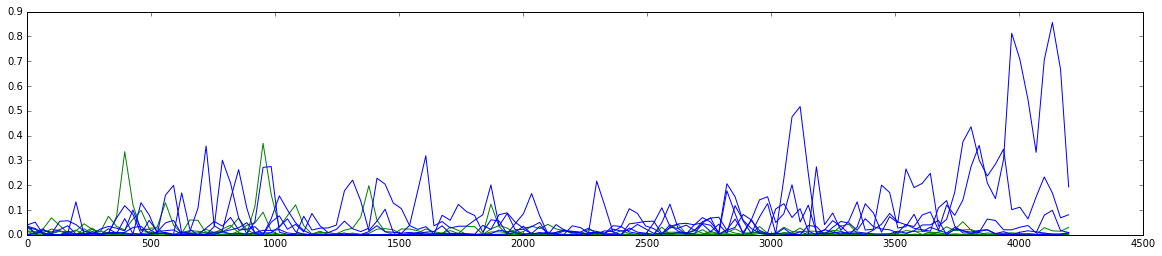

In [85]:
plt.figure(figsize=(20,4))
for h in H1:
    plt.plot(w,h,'g')
    print h.sum()

print 
for h in H2:
    plt.plot(w,h,'b')
    print h.sum()

plt.show()